In [251]:
# make necessary imports

import pandas as pd
import numpy as np
import re
import math
import matplotlib.pyplot as plt 
%matplotlib inline
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to C:\Users\Kanishk
[nltk_data]     Kalra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Kanishk
[nltk_data]     Kalra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [252]:
# read the dataset

data = pd.read_csv("tweets-dataset.csv")
doc = ""
for i in range(24521):
    doc = doc + data['Sentence'][i] + "\n"

In [253]:
# clean the data

# removing hashtags and usernames
doc = re.sub(r'[@#][^\s]*','',doc)
# removing hyperlinks
doc = re.sub(r'(pic.twitter)[^\s]*','',doc)
doc = re.sub(r'(http)[^\s]*','',doc)
# removing emoticons
doc = re.sub(r'(:d)','',doc)
doc = re.sub(r'(:D)','',doc)
doc = re.sub(r'(:-d)','',doc)
doc = re.sub(r'(:-D)','',doc)
doc = re.sub(r'(:p)','',doc)
doc = re.sub(r'(:P)','',doc)
doc = re.sub(r'(:-p)','',doc)
doc = re.sub(r'(:-P)','',doc)
doc = re.sub(r'(:v)','',doc)
doc = re.sub(r'(:V)','',doc)
doc = re.sub(r'(:-v)','',doc)
doc = re.sub(r'(:-V)','',doc)
doc = re.sub(r'(:0)','',doc)
doc = re.sub(r'(:-0)','',doc)
doc = re.sub(r'(:o)','',doc)
doc = re.sub(r'(:O)','',doc)
doc = re.sub(r'(:-o)','',doc)
doc = re.sub(r'(:-O)','',doc)
doc = re.sub(r'(<3)','',doc)
doc = re.sub(r'(<\/3)','',doc)
# removing special characters
doc = re.sub(r'[^a-zA-Z0-9\s]','',doc)
# converting the data to lower case
doc = doc.lower()

In [254]:
# find types, tokens and ttr

tokens=nltk.word_tokenize(doc)

a = len(tokens)
print("Number of tokens = " + str(a))

b = len(set(tokens))
print("Number of types = " + str(b))

c = b/a
print("TTR = " + str(c))

Number of tokens = 287839
Number of types = 31992
TTR = 0.11114546673661317


In [255]:
# frequency distribution of all word types

freq_distribution = sorted(FreqDist(tokens).items(),key=lambda k:k[1], reverse=True)
# print(freq_distribution)

# Zipf's law

In [256]:
# NOTE: It is very difficult to show zipf's law for this dataset as it contains a lot of hindi words whose meanings
# cannot be found.
# Here, I have chosen some representative words from the dataset that help display the empirical relation.

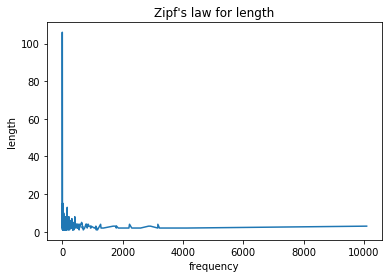

In [257]:
# Zipf's law for length: plotted for all word types

freq = []
length = []
for i in range(len(freq_distribution)):
    length.append(len(freq_distribution[i][0]))
    freq.append(freq_distribution[i][1])

plt.plot(freq, length)
plt.xlabel('frequency')
plt.ylabel('length') 
plt.title('Zipf\'s law for length') 
plt.show()

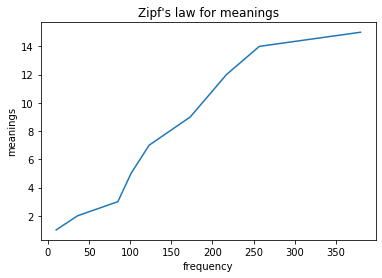

In [258]:
# Zipf's law for meanings

# indices of freq_distribution to consider for plotting
indices = [86,149,173,217,303,373,453,1015,3126]
freq = []
meanings = []
for i in range(len(indices)):
    freq.append(freq_distribution[indices[i]][1])
    meanings.append(len(wordnet.synsets(freq_distribution[indices[i]][0])))

plt.plot(freq, meanings)
plt.xlabel('frequency')
plt.ylabel('meanings') 
plt.title('Zipf\'s law for meanings') 
plt.show()

# Heaps law

In [259]:
# dividing the corpus into different sizes

nos = 0
aais = []
for i in range(len(doc)):
    if (doc[i]=="\n"):
        nos+=1
        if (nos%100==0):
            aais.append(i)

N = []
V = []

for i in range(len(aais)):
    tok = nltk.word_tokenize(doc[:aais[i]])
    N.append(len(tok))
    V.append(len(set(tok)))    

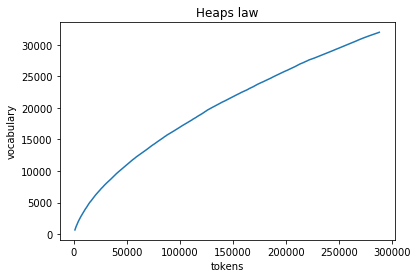

In [260]:
# plot heaps law

plt.plot(N, V) 
plt.xlabel('tokens')
plt.ylabel('vocabulary')
plt.title('Heaps law')
plt.show()

In [261]:
# determine k and beta using linear regression
# heaps law is V = k(N^beta) or ln(V) = ln(k) + (beta)ln(N)
# we use linear regression to find out ln(k) and beta

for i in range(len(N)):
    N[i] = math.log(N[i])
    V[i] = math.log(V[i])
N = np.array(N)
V = np.array(V)

# estimating coefficients

# number of observations/points 
n = np.size(N) 
  
# mean of N and V vector 
m_N, m_V = np.mean(N), np.mean(V) 
  
# calculating cross-deviation and deviation about N 
SS_NV = np.sum(V*N) - n*m_V*m_N 
SS_NN = np.sum(N*N) - n*m_N*m_N 
  
# calculating regression coefficients 
b_1 = SS_NV / SS_NN 
b_0 = m_V - b_1*m_N 
b_0 = math.exp(b_0)

print("k = " + str(b_0))
print("beta = " + str(b_1))

k = 9.6894842204525
beta = 0.6472177283483467
